Accuracy: 1.0


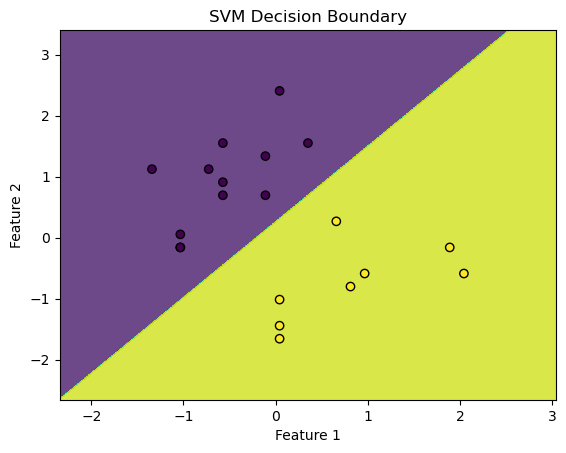

In [1]:
##@@What is the kernel trick in SVM?

#The kernel trick allows SVMs to perform linear classification in a high-dimensional feature space without explicitly mapping the data to that space. Instead, it uses a kernel function 
#𝐾(𝑥𝑖,𝑥𝑗)K(x i​,x j​) to compute the dot product in the high-dimensional space, enabling the algorithm to learn nonlinear decision boundaries. Common kernels include polynomial,radial basis function (RBF), and sigmoid.

##@  What is the role of support vectors in SVM? Explain with an example.

#Support vectors are the data points that lie closest to the decision boundary (hyperplane) and are critical in defining the position and orientation of the hyperplane. 
#They are the points that the margin "pushes" against, and the SVM uses them to maximize the margin.

#Example:
#Consider a binary classification problem with two features. The support vectors are the data points nearest to the hyperplane that separates the two classes. These points are crucial because the SVM optimization problem aims to maximize the margin between these points and the hyperplane.

###@@  Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM.

#Hyperplane: The decision boundary that separates the different classes in the feature space.
#Marginal Plane: The planes parallel to the hyperplane that pass through the support vectors. The distance between these planes defines the margin.
#Hard Margin: No slack variables are allowed; all points must be correctly classified without error. Used when the data is linearly separable.
#Soft Margin: Slack variables are introduced to allow some misclassification, used when the data is not linearly separable. The parameter 
#C controls the trade-off between maximizing the margin and minimizing the classification error.


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only two features for visualization
y = iris.target

# Only use two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot decision boundaries
def plot_decision_boundary(X, y, clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, y_test, clf)
